<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_003_RegressionMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day48-simple-linear-regression/placement.csv")

In [61]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [62]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_predict = lr.predict(X_test)

In [67]:
y_test

,package
95,2.79
15,3.23
30,3.26
158,3.04
128,3.34
115,4.21
69,2.94
170,2.87
174,2.99
45,3.58


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
print("MAE :", mean_absolute_error(y_test,y_predict))

MAE : 0.23150985393278373


In [70]:
print("MSE :", mean_squared_error(y_test,y_predict))

MSE : 0.08417638361329656


In [71]:
print("RMSE :", np.sqrt(mean_squared_error(y_test,y_predict)))

RMSE : 0.2901316659954521


In [72]:
r2 = r2_score(y_test,y_predict)
print("R2_Score :", r2)

R2_Score : 0.7730984312051673


In [73]:
print("Adjusted_R2_Score :", 1 - ((1 - r2)*(df.shape[0])) / ((df.shape[0] - 1 - (df.shape[1] - 1))))

Adjusted_R2_Score : 0.7708064961668357


Impact of irrelevant data on adjusted R2 Score

In [74]:
new_df_1 = df.copy()

In [75]:
new_df_1['irrelevant_feature'] = np.random.random(df.shape[0])

In [76]:
new_df_1

,cgpa,package,irrelevant_feature
0,6.89,3.26,0.340230
1,5.12,1.98,0.597977
2,7.82,3.25,0.469170
3,7.42,3.67,0.375988
4,6.94,3.57,0.144961
...,...,...,...
195,6.93,2.46,0.764035
196,5.89,2.57,0.614214
197,7.21,3.24,0.759164
198,7.63,3.96,0.203213


In [81]:
X = new_df_1[['cgpa','irrelevant_feature']]
y = new_df_1['package']

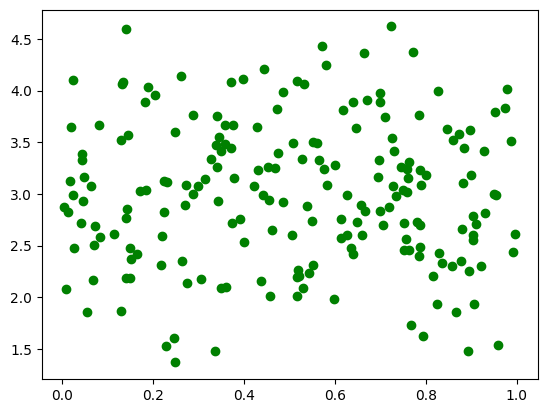

In [84]:
plt.scatter(new_df_1['irrelevant_feature'], new_df_1['package'],color='green')

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [86]:
lr.fit(X_train,y_train)

LinearRegression()

In [88]:
y_predict = lr.predict(X_test)

In [110]:
r2_ = r2_score(y_predict, y_test)
print("R2_Score :", r2_)

R2_Score : 0.7412025189377607


In [111]:
print("Adjusted_R2_Score :", 1 - ((1 - r2_)*(new_df_1.shape[0])) / ((new_df_1.shape[0] - 1 - (new_df_1.shape[1] - 1))))

Adjusted_R2_Score : 0.7372614405459499


Impact of Relevant data on adjusted r2 score

In [99]:
new_df_2 = df.copy()

In [100]:
new_df_2['relevent_feature'] = new_df_2['package'] + np.random.randint(-12,12,new_df_2.shape[0]) / 10

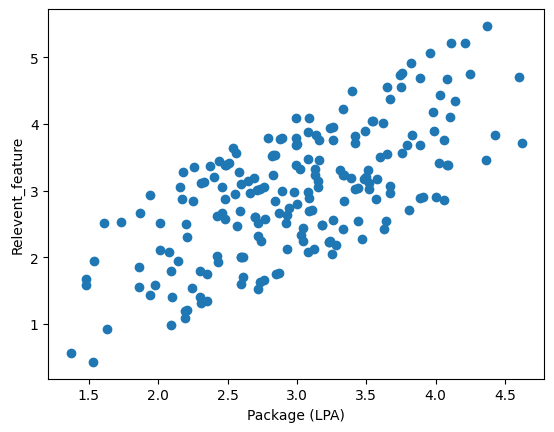

In [103]:
plt.scatter(new_df_2['package'], new_df_2['relevent_feature'])
plt.xlabel('Package (LPA)')
plt.ylabel('Relevent_feature')
plt.show()

In [105]:
X = new_df_2[['cgpa','relevent_feature']]
y = new_df_2['package']

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
lr.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred = lr.predict(X_test)

In [112]:
r2_1= r2_score(y_predict, y_test)
print("R2_Score :", r2_1)

R2_Score : 0.7412025189377607


In [113]:
print("Adjusted R2 Score :", 1 - ((1 -  r2_1) * (new_df_2.shape[0] - 1))/((new_df_2.shape[0] - 1 - (new_df_2.shape[1] - 1))))

Adjusted R2 Score : 0.7385751333432202
